<a href="https://colab.research.google.com/github/NitishaSham/Heart-Disease-Prediction---Naive-Bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

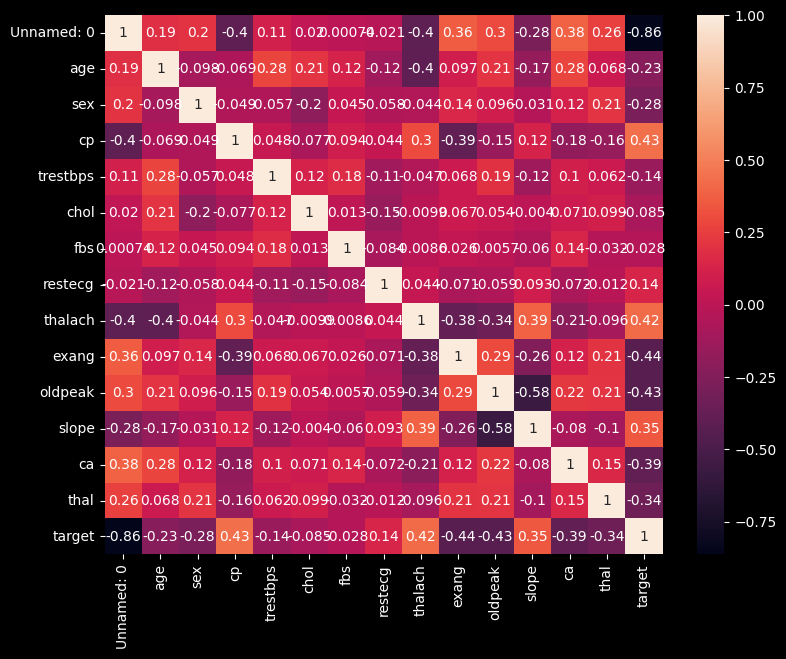

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Heart.csv')
df.head()
df['target'].value_counts()
df_corr = df.corr()
plt.figure(figsize = (9,7))
sns.heatmap(df_corr,annot = True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [38]:
x = df.drop('target',axis = 1)
y = df['target']
print(x.shape, y.shape)

(303, 14) (303,)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(212, 14) (91, 14) (212,) (91,)


In [40]:
from sklearn.naive_bayes import GaussianNB  
nb_clf = GaussianNB()  
nb_clf.fit(x_train, y_train)
y_train_predict_nb = nb_clf.predict(x_train)
y_test_predict_nb = nb_clf.predict(x_test)  
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(x_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(x_test, y_test)))

Accuracy on the training set: 0.96
Accuracy on the test set: 0.95


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_test_predict_nb))
print(classification_report(y_test, y_test_predict_nb))

[[40  1]
 [ 4 46]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.98      0.92      0.95        50

    accuracy                           0.95        91
   macro avg       0.94      0.95      0.94        91
weighted avg       0.95      0.95      0.95        91



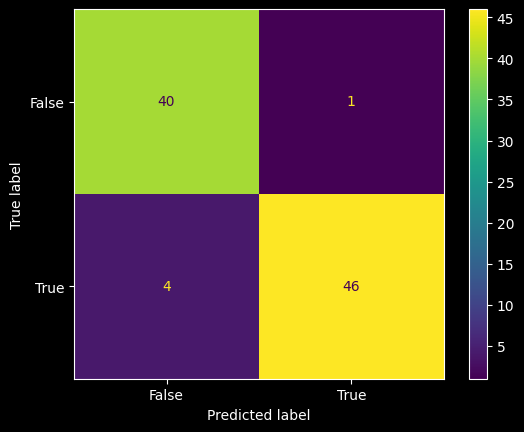

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_predict_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()